# INFS768 - Final Project

## Import Libraries / Import Data

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn

## Outer Join 2016+2017 data

In [3]:
df1 = pd.read_csv('training_2016.csv', index_col=0, na_values=['NA'], sep=',',low_memory=False)
df2 = pd.read_csv('training_2017.csv', index_col=0, na_values=['NA'], sep=',',low_memory=False)
dataset = df1.merge(df2, how='outer')
dataset.to_csv('merged_data.csv')

In [4]:
dataset.head()

,parcelid,logerror,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,heatingorsystemtypeid,...,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,censustractandblock
0,10711738.0,0.0276,209.0,3.0,4.0,4.0,2538.0,2538.0,6037.0,2.0,...,12447.0,3101.0,96339.0,0.0,1978.0,245180.0,567112.0,2015.0,321932.0,6.037113e+13
1,10711755.0,-0.0182,209.0,3.0,3.0,4.0,1589.0,1589.0,6037.0,2.0,...,12447.0,3101.0,96339.0,0.0,1959.0,254691.0,459844.0,2015.0,205153.0,6.037113e+13
2,10711805.0,-0.1009,121.0,2.0,3.0,4.0,2411.0,2411.0,6037.0,2.0,...,12447.0,3101.0,96339.0,0.0,1973.0,235114.0,384787.0,2015.0,149673.0,6.037113e+13
3,10711816.0,-0.0121,93.0,2.0,4.0,4.0,2232.0,2232.0,6037.0,2.0,...,12447.0,3101.0,96339.0,0.0,1973.0,262309.0,437176.0,2015.0,174867.0,6.037113e+13
4,10711858.0,-0.0481,191.0,2.0,4.0,4.0,1882.0,1882.0,6037.0,2.0,...,12447.0,3101.0,96339.0,0.0,1973.0,232037.0,382055.0,2015.0,150018.0,6.037113e+13


In [5]:
print('The shape of our features is:', dataset.shape)

The shape of our features is: (148241, 26)


In [6]:
# drop parcelid to exclude from analysis
    # axis 1 refers to the columns
dataset = dataset.drop('parcelid', axis = 1)

# Descriptive statistics for each column
dataset.describe()

,logerror,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,...,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,censustractandblock
count,148241.000000,148241.000000,148241.000000,148241.000000,148241.000000,148241.000000,148241.000000,148241.000000,148241.000000,1.482410e+05,...,148241.000000,148241.000000,148241.000000,148241.000000,148241.000000,1.482410e+05,1.482410e+05,148241.000000,1.482410e+05,1.482410e+05
mean,0.005245,149.835450,2.220435,2.993133,4.676305,1672.244554,1649.743944,6049.021586,5.622624,3.400615e+07,...,34062.634482,2518.338793,96585.910179,1.510169,1969.140225,1.643843e+05,4.247896e+05,2015.462578,2.605450e+05,6.049340e+13
std,0.052385,78.449122,0.810469,1.023618,2.807122,685.606288,673.448227,20.755171,4.669709,2.662666e+05,...,46826.696926,808.044968,3365.135815,2.823826,23.189998,1.308985e+05,3.794774e+05,0.498599,2.951560e+05,2.060438e+11
min,-0.155500,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,6037.000000,1.000000,3.333930e+07,...,3491.000000,1286.000000,95982.000000,0.000000,1878.000000,4.400000e+01,2.200000e+01,2015.000000,2.200000e+01,6.037101e+13
25%,-0.022701,88.000000,2.000000,2.000000,4.000000,1176.000000,1166.000000,6037.000000,2.000000,3.380991e+07,...,12447.000000,1286.000000,96206.000000,0.000000,1954.000000,8.319600e+04,2.046490e+05,2015.000000,8.399200e+04,6.037401e+13
50%,0.005000,151.000000,2.000000,3.000000,5.199984,1518.000000,1495.000000,6037.000000,5.994874,3.401637e+07,...,25218.000000,3101.000000,96398.000000,0.000000,1971.000000,1.326450e+05,3.466230e+05,2015.000000,1.950000e+05,6.037621e+13
75%,0.032688,211.000000,3.000000,4.000000,7.000000,2023.000000,1984.000000,6059.000000,7.000000,3.417540e+07,...,45602.000000,3101.000000,96987.000000,0.000000,1987.000000,2.061580e+05,5.320780e+05,2016.000000,3.414460e+05,6.059042e+13
max,0.168900,350.000000,5.000000,8.000000,12.000000,4000.000000,4000.000000,6111.000000,24.000004,3.481877e+07,...,396556.004084,3101.000000,399675.000000,13.000000,2016.000000,4.653658e+06,1.561849e+07,2016.000000,1.435090e+07,6.111009e+13


## Features and Labels and Convert Data to Arrays

In [7]:
# assign logerror to an array
y = np.array(dataset['logerror'])

# remove logerror from remaining data
X = dataset.drop('logerror', axis = 1)

print('The shape of our features is:', X.shape)

The shape of our features is: (148241, 24)


In [8]:
X.head()

,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,heatingorsystemtypeid,latitude,longitude,...,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,censustractandblock
0,209.0,3.0,4.0,4.0,2538.0,2538.0,6037.0,2.0,34220381.0,-118620802.0,...,12447.0,3101.0,96339.0,0.0,1978.0,245180.0,567112.0,2015.0,321932.0,6.037113e+13
1,209.0,3.0,3.0,4.0,1589.0,1589.0,6037.0,2.0,34222040.0,-118622240.0,...,12447.0,3101.0,96339.0,0.0,1959.0,254691.0,459844.0,2015.0,205153.0,6.037113e+13
2,121.0,2.0,3.0,4.0,2411.0,2411.0,6037.0,2.0,34220427.0,-118618549.0,...,12447.0,3101.0,96339.0,0.0,1973.0,235114.0,384787.0,2015.0,149673.0,6.037113e+13
3,93.0,2.0,4.0,4.0,2232.0,2232.0,6037.0,2.0,34222390.0,-118618631.0,...,12447.0,3101.0,96339.0,0.0,1973.0,262309.0,437176.0,2015.0,174867.0,6.037113e+13
4,191.0,2.0,4.0,4.0,1882.0,1882.0,6037.0,2.0,34222544.0,-118617961.0,...,12447.0,3101.0,96339.0,0.0,1973.0,232037.0,382055.0,2015.0,150018.0,6.037113e+13


## Split train/test sets

In [4]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [6]:
print('X Training Data Shape:', X_train.shape)
print('y Training Data Shape:', y_train.shape)
print('X Testing Data Shape:', X_test.shape)
print('y Testing Data Shape:', y_test.shape)

X Training Data Shape: (53377, 24)
y Training Data Shape: (53377,)
X Testing Data Shape: (26291, 24)
y Testing Data Shape: (26291,)


## Scale the data

In [8]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
# transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Determine parameters

In [10]:
from sklearn.neural_network import MLPRegressor

Determine hidden_layer_sizes before running the model.

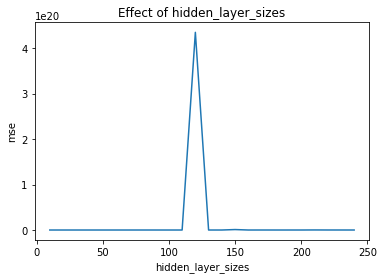

In [11]:
# Establish model
pcp = MLPRegressor(random_state=42)

# Try different numbers of hidden_layer_sizes - this will take a minute or so
h_layers = np.arange(10, 250, 10)
mse = []
for n in h_layers:
    pcp.set_params(hidden_layer_sizes=n)
    pcp.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, pcp.predict(X_test)))
plt.title("Effect of hidden_layer_sizes")
plt.xlabel("hidden_layer_sizes")
plt.ylabel("mse")
plt.plot(h_layers, mse)

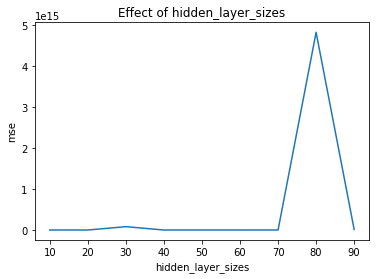

In [14]:
# Establish model
pcp = MLPRegressor(random_state=42)

# Try different numbers of hidden_layer_sizes - this will take a minute or so
h_layers = np.arange(10, 100, 10)
mse = []
for n in h_layers:
    pcp.set_params(hidden_layer_sizes=n)
    pcp.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, pcp.predict(X_test)))
plt.title("Effect of hidden_layer_sizes")
plt.xlabel("hidden_layer_sizes")
plt.ylabel("mse")
plt.plot(h_layers, mse)

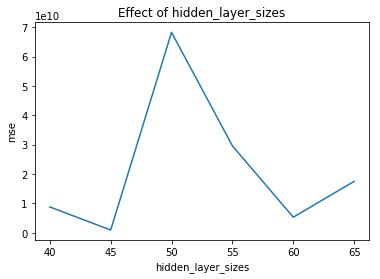

In [15]:
# Establish model
pcp = MLPRegressor(random_state=42)

# Try different numbers of hidden_layer_sizes - this will take a minute or so
h_layers = np.arange(40, 70, 5)
mse = []
for n in h_layers:
    pcp.set_params(hidden_layer_sizes=n)
    pcp.fit(X_train, y_train)
    mse.append(mean_squared_error(y_test, pcp.predict(X_test)))
plt.title("Effect of hidden_layer_sizes")
plt.xlabel("hidden_layer_sizes")
plt.ylabel("mse")
plt.plot(h_layers, mse)

## Run the model

In [15]:
# set model parameters
mlp = MLPRegressor(hidden_layer_sizes=45, 
                   activation='tanh', 
                   solver='lbfgs', 
                   random_state=42)
# fit the model with training data
mlp.fit(X_train_scaled, y_train)
# performance metric
mse = mean_squared_error(y_test, mlp.predict(X_test_scaled))
print("MSE: %.8f" % mse)

MSE: 0.00122872
